# **Inference on an input image of the original and modified Keypoint Detection models**

In [ ]:
# mount google drive if necessary
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# clone the github repository only for the first time
!git clone https://github.com/WongKinYiu/yolov7.git
!git clone -b pose https://github.com/WongKinYiu/yolov7.git
%cd yolov7

In [ ]:
# install requirements and weights for the first time
!pip install -r requirements.txt
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6-pose.pt
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
# import necessary libraries and packages
import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
import pandas as pd
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts
from utils.torch_utils import time_synchronized

# yolov7-w6-pose.pt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('./weights/epoch300_best_orig.pt', map_location=device)
model = weigths['model']
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f"total params: {pytorch_total_params}")
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

total params: 80238452


In [ ]:
image = cv2.imread('./inference/images/bus.jpg')
print(image.shape)
image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))

if torch.cuda.is_available():
    image = image.half().to(device)

(1080, 810, 3)


In [ ]:
t1 = time_synchronized()
output, _ = model(image)
t2 = time_synchronized()
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
t3 = time_synchronized()
print(f"inference time: {(t2-t1)*1000}ms")
print(f"NMS time: {(t3-t2)*1000}ms")
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)

for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)

inference time: 49.19147491455078ms
NMS time: 2.286672592163086ms


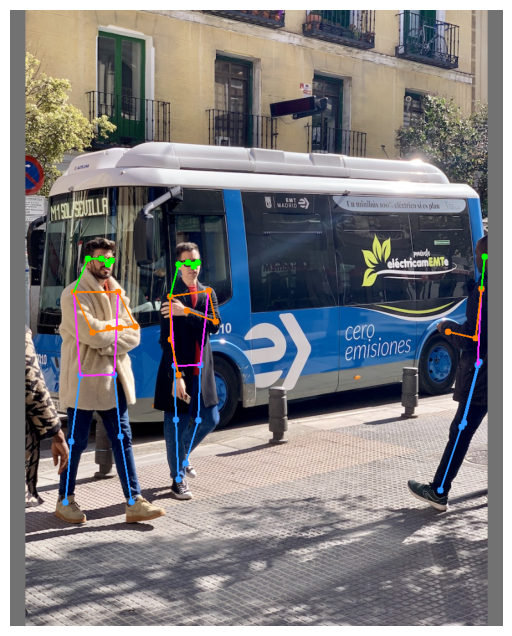

(4, 58)


"# output_np = output.numpy()\noutput_df = pd.DataFrame(output)\noutput_df.to_csv('tmp.csv')\n\nprint(output[256].T)"

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()
print(output.shape)

#yolov7-w6-pose-mod.pt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('./weights/epoch300_best_mod.pt', map_location=device)
model = weigths['model']
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f"total params: {pytorch_total_params}")
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

total params: 70320756


In [ ]:
image = cv2.imread('./inference/images/bus.jpg')
image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))

if torch.cuda.is_available():
    image = image.half().to(device)

In [ ]:
t1 = time_synchronized()
output, _ = model(image)
t2 = time_synchronized()
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
t3 = time_synchronized()
print(f"inference time: {1/(t2-t1)")
print(f"NMS time: {(t3-t2)*1000}ms")
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)

for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)
print(output.shape)

inference time: 50.97055435180664ms
NMS time: 3.201007843017578ms
(3, 58)


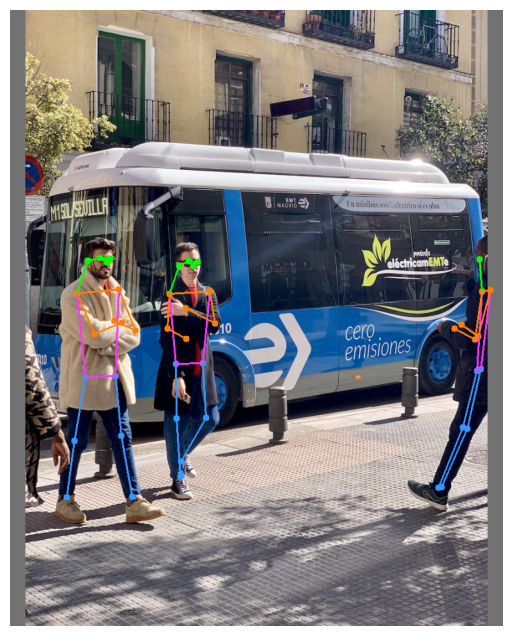

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()

#yolov7-w6-pose-mod2.pt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('./weights/epoch300_last_mod2.pt', map_location=device)
model = weigths['model']
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f"total params: {pytorch_total_params}")
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

total params: 71311988


In [ ]:
image = cv2.imread('./inference/images/bus.jpg')
image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))

if torch.cuda.is_available():
    image = image.half().to(device)

In [ ]:
t1 = time_synchronized()
output, _ = model(image)
t2 = time_synchronized()
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
t3 = time_synchronized()
print(f"inference time: {(t2-t1)*1000}ms")
print(f"NMS time: {(t3-t2)*1000}ms")
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)
print(output.shape)

inference time: 41.440486907958984ms
NMS time: 2.3071765899658203ms
(4, 58)


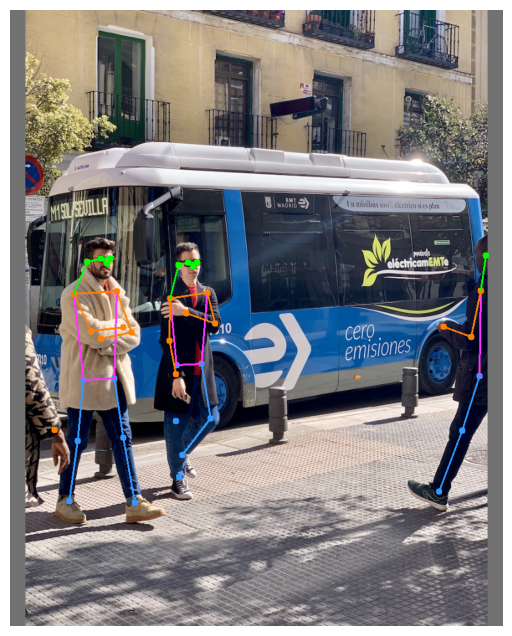

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()

#yolov7-w6-pose-mod3.pt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('./weights/epoch300_best_mod3.pt', map_location=device)
model = weigths['model']
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f"total params: {pytorch_total_params}")
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

total params: 65857524


In [ ]:
image = cv2.imread('./inference/images/bus.jpg')
image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))

if torch.cuda.is_available():
    image = image.half().to(device)

In [ ]:
t1 = time_synchronized()
output, _ = model(image)
t2 = time_synchronized()
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
t3 = time_synchronized()
print(f"inference time: {(t2-t1)*1000}ms")
print(f"NMS time: {(t3-t2)*1000}ms")
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)
print(output.shape)

inference time: 36.39388084411621ms
NMS time: 2.422809600830078ms
(4, 58)


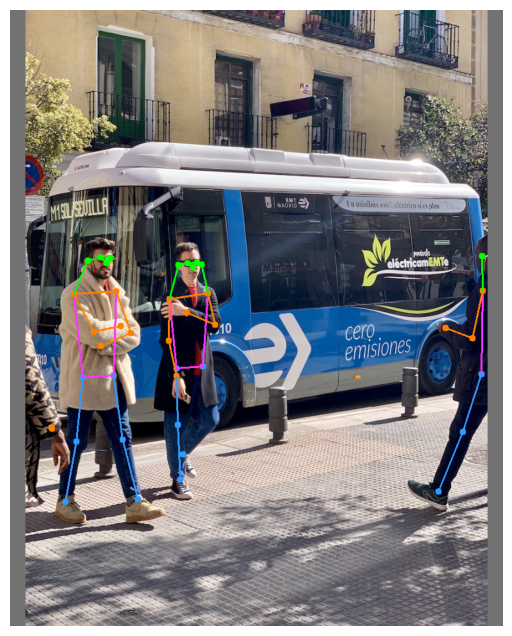

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()